In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Часть I: О теореме Байеса

1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


### Решение

Должен был оценить, вероятность того, что виновен с условием, что кровь редкая:

$$ Р(виновен | кровь~редкая) = Р(виновен~и~кровь~редкая) / Р(виновен) $$
оценил:

$$1 - P(редкая~кровь)$$

2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Решение

Должен был оценить, вероятность того, что виновен с условием, что кровь редкая:
    
$$ Р(виновен | кровь~редкая) = Р(виновен~и~кровь~редкая) / Р(виновен) $$
оценил:

$$P(виновен)$$

3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Решение

$P(болен = 1|тест = 1) = \frac{P(тест = 1|болен = 1)P(болен = 1)}{P(тест = 1)} = \frac{P(тест = 1|болен = 1)P(болен = 1)}{P(test = 1|болен = 0) P(болен = 0) + P(test = 1|болен = 1) P(болен = 1)} = \frac{(1 - P(FN))P(болен = 1)}{P(FP) P(болен = 0) + (1 - P(FN)) P(болен = 1)} = \frac{(1 - P(FN)) * 0.01}{P(FP) * 0.99 + (1 - P(FN)) *0.01} = \frac{(1 - FNR) * 0.01}{FPR * 0.99 + (1 - FNR) * 0.01}$



$P(болен = 1|тест= 0) = \frac{P(test = 0|болен = 1)P(болен = 1)}{P(тест = 0)} = \frac{P(test = 0|болен = 1)P(болен = 1)}{P(тест = 0|болен = 0) P(болен = 0) + P(тест = 0|болен = 1) P(болен = 1)} = \frac{P(FN)P(болен = 1)}{(1 - P(FP)) P(болен = 0) + P(FN) P(болен = 1)} = \frac{P(FN) * 0.01}{(1 - P(FP)) * 0.99 + P(FN) * 0.01} = \frac{FNR * 0.01}{(1 - FPR) * 0.99 + FNR * 0.01}$

# Часть II: О линейной регрессии

1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. 

Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
df2 = df[df['location'] == 'Russia']
df2 = df2[df2['date'] >= '2020-03-03']
df2.loc[df2.new_cases == 0, 'new_cases'] = 1
df2 = df2.reset_index(drop = True)

2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

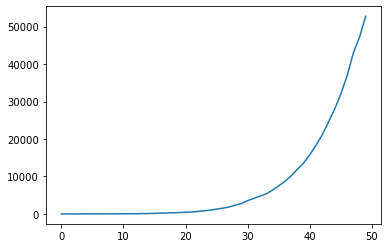

In [4]:
plt.plot(df2.iloc[:50]['total_cases'])

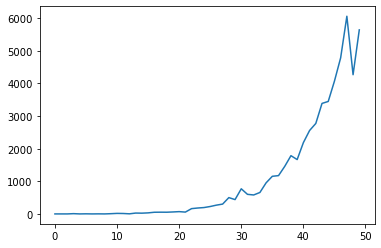

In [5]:
plt.plot(df2.iloc[:50]['new_cases'])

 a.

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [6]:
model = LinearRegression()

In [7]:
df2['log_new_cases'] = np.log(df2['new_cases'])

In [8]:
df_test = df2.iloc[:50]
df_train = df2.iloc[50:]

X = np.array(range(50)).reshape(-1, 1)
y = list(df_test['log_new_cases'])

model.fit(X, y)

LinearRegression()

In [9]:
# t = a * x + b 
# e ** t
a = model.coef_
b = model.intercept_

def exp_lin (x, a, b):
    return np.exp(a * x + b)

In [28]:
class BayReg:
    def __init__(self, mu0, sigma0):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu = mu0
        self.sigma = sigma0
        self.is_fitted = False    

    @staticmethod
    def add_ones(X):
        return np.hstack((X, np.ones((len(X), 1))))
    
    @staticmethod
    def estimate_noise(X, y):
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        noise = np.var(y - X @ w)
        return noise
    
    def bayesian_update(self, X, y, noise):
        sigma = np.linalg.inv(self.sigma0) + X.T @ X / noise
        self.sigma = np.linalg.inv(sigma)
        
        mu = np.linalg.inv(self.sigma0) @ self.mu0 + X.T @ y / noise
        self.mu = self.sigma @ mu
    
    def fit(self, X, y):
        X = self.add_ones(X)
        noise = self.estimate_noise(X, y)
        self.bayesian_update(X, y, noise)
        self.is_fitted = True
        return self
    
    def predict(self, X):
        X = self.add_ones(X)
        return X @ self.mu

In [29]:
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]

bayesian_regression = BayReg(mu0, sigma0)
bayesian_regression.fit(X, y)

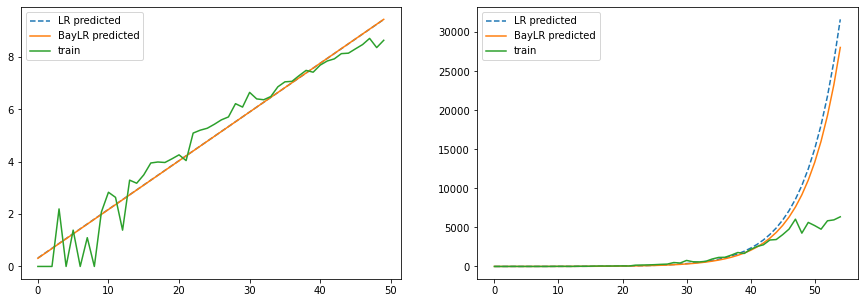

In [30]:
N_DAYS = 55

figure, axis = plt.subplots(1, 2, figsize=(15, 5)) 


axis[0].plot(model.predict(X), linestyle = '--', label = 'LR predicted')
axis[0].plot(bayesian_regression.predict(X), label = 'BayLR predicted')
axis[0].plot(y, label = 'train')
axis[0].legend(loc="upper left")


axis[1].plot(exp_lin(np.array(range(N_DAYS)), a, b), linestyle = '--', label = 'LR predicted')
axis[1].plot(exp_lin(np.array(range(N_DAYS)), bayesian_regression.mu[0], bayesian_regression.mu[0]), label = 'BayLR predicted')
axis[1].plot(df2.iloc[:N_DAYS]['new_cases'], label = 'train')
axis[1].legend(loc="upper left")
